<a href="https://colab.research.google.com/github/ankit-genzeon/AI-ML-Bootcamp-Genzeon-2023/blob/master/C4_SUV_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50         

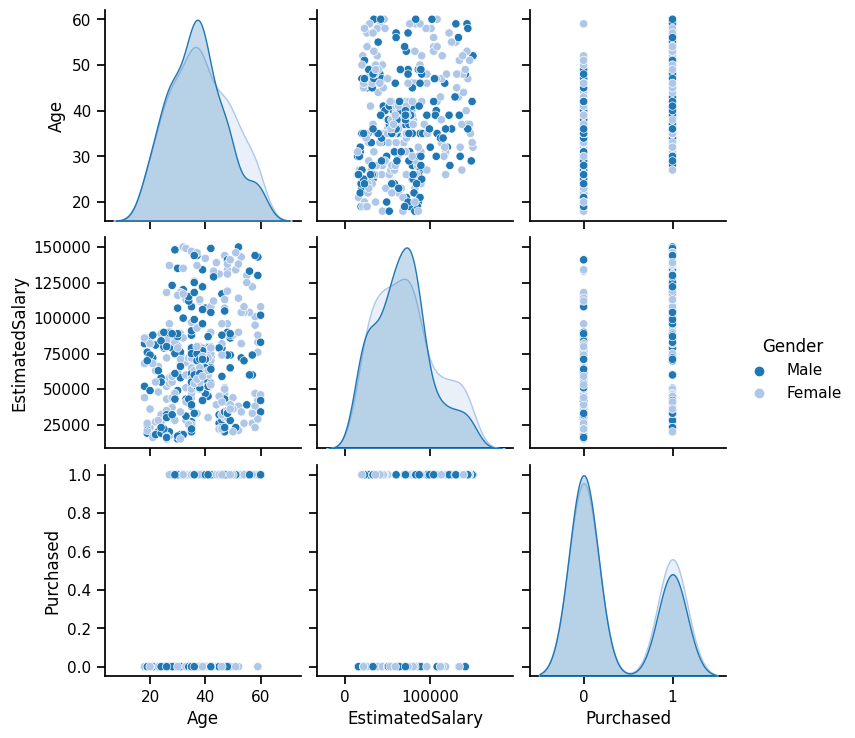

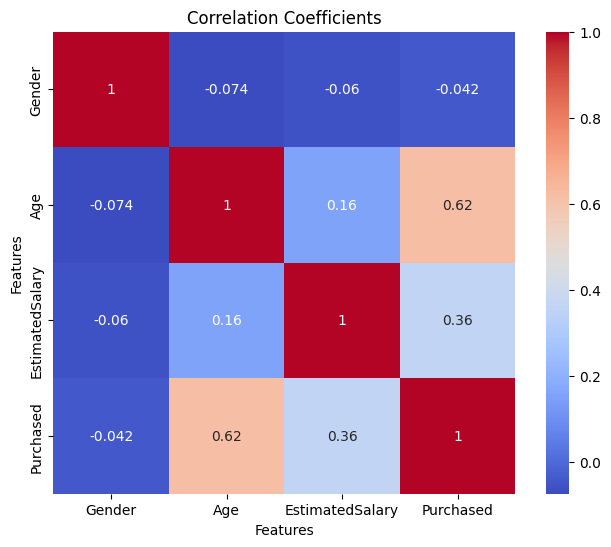

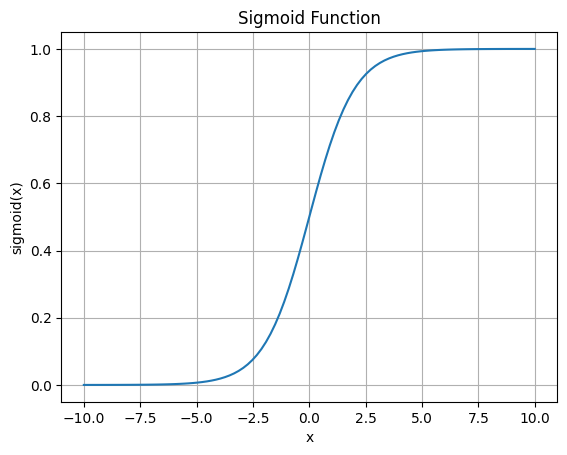

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Accuracy: 0.7875
Confusion Matrix : 
[[40  6]
 [11 23]]
Confusion matrix for training Data :: 
[[200  11]
 [ 31  78]]
Confusion matrix for training Data :: 
[[40  6]
 [11 23]]
Confusion matrix for overall Data 
[[257   0]
 [143   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

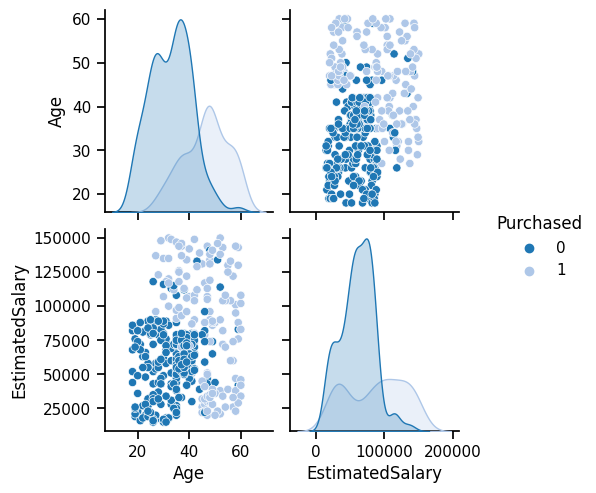

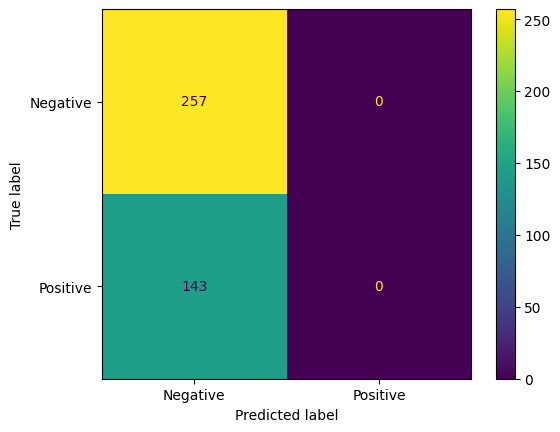

In [12]:
dataset='/content/drive/MyDrive/Colab Notebooks/DataSet/SUV_Purchase.csv'
import pandas as pd
df=pd.read_csv(dataset)
df.head()

df.info()

df.columns

from seaborn.rcmod import palettes
import seaborn as sns
with sns.plotting_context("notebook"):
  sns.pairplot(df[['Gender', 'Age', 'EstimatedSalary', 'Purchased']],hue='Gender',palette='tab20')

from sklearn.preprocessing import LabelEncoder

gender=df['Gender']
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(gender)

print(df)

df.info()

import matplotlib.pyplot as plt
import seaborn as sns
#df.drop(['User ID'],axis=1)
correlation=df[['Gender','Age','EstimatedSalary','Purchased']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)

plt.title('Correlation Coefficients')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values from -10 to 10
x = np.linspace(-10, 10, 100)

# Calculate corresponding y values using the sigmoid function
y = sigmoid(x)

# Plot the sigmoid function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

from seaborn.rcmod import palettes
import seaborn as sns
with sns.plotting_context("notebook"):
  sns.pairplot(df[['Age','EstimatedSalary','Purchased']],hue='Purchased',palette='tab20')

'''X->Independent
Y->Dependent'''

X=df.drop(['User ID','Purchased'],axis=1)
Y=df[['Purchased']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

x_train

#Normalizing the data - standard Scalar
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
x_train=sst.fit_transform(x_train)
x_test=sst.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train,y_train)

y_pred=knn_clf.predict(x_test)

knn_clf.score(sst.transform(X),Y)

"""Best K value"""

import numpy as np
neighbors=np.arange(1,20)
overall_accuracy=np.empty(len(neighbors))
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))


for i,k in enumerate(neighbors):
  knn_clf=KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(x_train,y_train)

  #training accuracy
  train_accuracy[i]=knn_clf.score(x_train,y_train)
  test_accuracy[i]=knn_clf.score(x_test,y_test)

train_accuracy

test_accuracy

x_train

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred=model.predict(x_test)
y_pred

model.score(x_test,y_test)

model.score(x_train,y_train)*100

X=sst.transform(X)

model.score(X,Y)*100

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate and display the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ')
print(confusion)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix for training Data :: ")

cm1=confusion_matrix(y_train,model.predict(x_train))

print(cm1)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix for training Data :: ")

cm2=confusion_matrix(y_test,model.predict(x_test))

print(cm2)

print("Confusion matrix for overall Data ")

actual=Y

predicted=model.predict(sst.transform(X))

cm=confusion_matrix(actual,predicted)

print(cm)

from sklearn import metrics

import matplotlib.pyplot as plt

cm=metrics.confusion_matrix(actual,predicted)

cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Negative','Positive'])

cm_display.plot()